<a href="https://colab.research.google.com/github/Suhani8650/Admin-login-page/blob/main/TreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.12.0rc0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0-rc0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! gdown -- id /content/drive/MyDrive/archive (3).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` gdown -- id /content/drive/MyDrive/archive (3).zip'


In [4]:
from zipfile import ZipFile

In [5]:
with ZipFile("/content/drive/MyDrive/archive (3).zip",'r')as zipObj:
  zipObj.extractall('drive/MyDrive/test')


In [6]:
import os
repo_path = "/content/drive/MyDrive/test/Tree_Species_Dataset"
print("Contents:",os.listdir(repo_path))


Contents: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [7]:
count_dirs = os.listdir(repo_path)
print ("Number of classes: ", len(count_dirs))

Number of classes:  31


In [8]:
import glob

image_paths  = []
labels = []

for class_name in os.listdir(repo_path):
  class_folder = os.path.join(repo_path,class_name)
  if os.path.isdir(class_folder):
    for img_file in os.listdir(class_folder):
      image_paths.append(os.path.join(class_folder, img_file))
      labels.append(class_name)
print( "Total images : " ,len(image_paths))

Total images :  1605


In [9]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in count_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


           Image Count
other              150
kesudo              50
khajur              50
sugarcane           50
sonmahor            50
shape:  (31, 1)


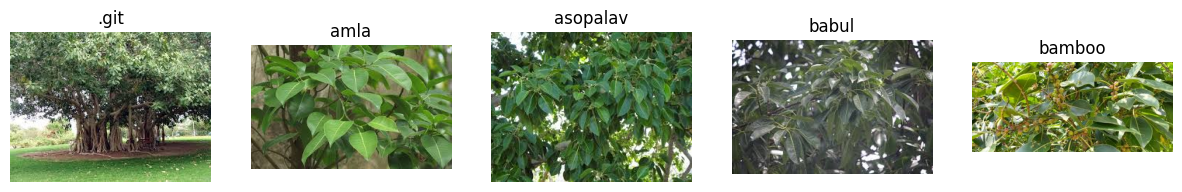

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, count_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(count_dirs[:n]):
        img_path = os.path.join(repo_path, class_folder, os.listdir(os.path.join(repo_path, class_folder))[i])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, count_dirs)

In [11]:
image_shapes = []

for class_dir in count_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_folder)):
        img_path = os.path.join(repo_path, class_folder, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)


import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()


,Width,Height
0,259,194
1,286,176
2,259,194
3,275,183
4,335,151


In [12]:
print(shapes_df.describe())

             Width       Height
count  1550.000000  1550.000000
mean    249.980000   202.180000
std      34.379385    28.915861
min     183.000000   151.000000
25%     224.000000   183.000000
50%     259.000000   194.000000
75%     275.000000   225.000000
max     335.000000   275.000000


In [13]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in count_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_folder)):
        img_path = os.path.join(repo_path, class_folder, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 49


In [14]:
corrupt_images = []

for class_dir in count_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_folder)):
        img_path = os.path.join(repo_path, class_folder, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


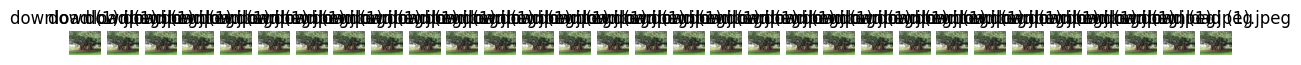

Duplicate set 2:


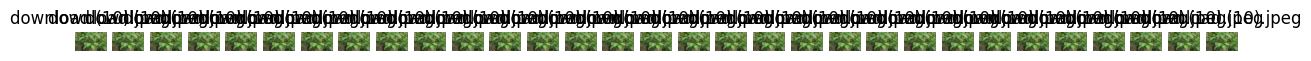

Duplicate set 3:


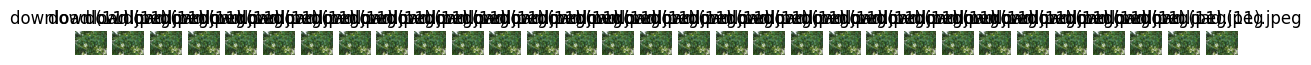

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates , sets_to_display=3)



In [16]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
             print(f"Error deleting {img_path}: {e}")

print("Removed {",removed_count,"} duplicate images.")

Error deleting /content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg'
Error deleting /content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg'
Error deleting /content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg'
Error deleting /content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg'
Error deleting /content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/Tree_Species_Dataset/vad/download (1).jpeg'
Error deleting 

In [17]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

# Iterate through each class directory to get image paths after removal
for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            if os.path.isfile(img_path):  # Check if it's a file
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except FileNotFoundError:
                    # Skip files that were already removed
                    continue


duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 81


In [18]:
from PIL import Image
import pandas as pd
import os

# Gather image info
image_info = []

for class_dir in count_dirs:
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path): # Added check to ensure class_path is a directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_info.append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'class': class_dir
                    })
            except:
                continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


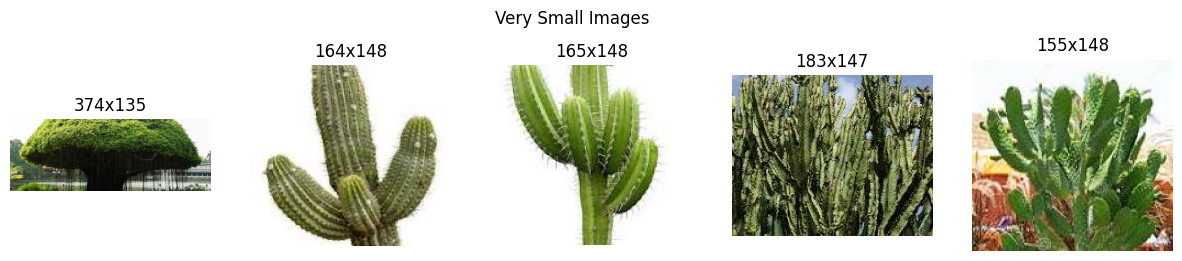

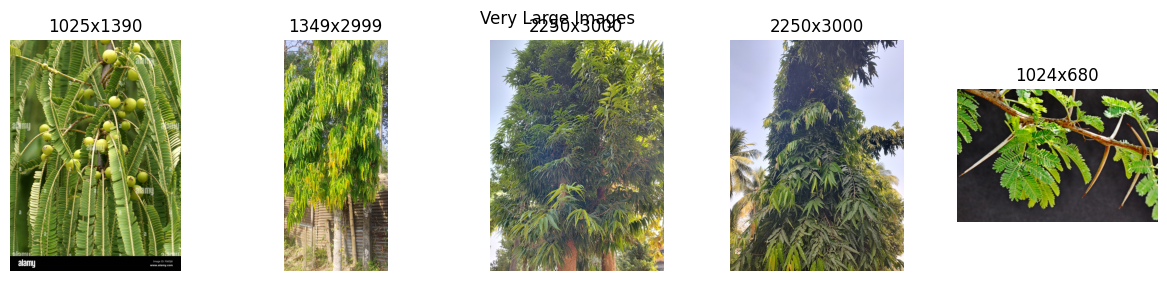

In [19]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [20]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [21]:
# Recalculate sizes
image_info = []

for class_dir in count_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1490.000000  1490.000000
mean    275.513423   239.157718
std     117.287505   117.236044
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   199.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [22]:
# Recalculate sizes
image_info = []

for class_dir in count_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())
subset='validation'


             width       height
count  1490.000000  1490.000000
mean    275.513423   239.157718
std     117.287505   117.236044
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   199.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1198 images belonging to 31 classes.
Found 292 images belonging to 31 classes.


In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 31)                39

In [25]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10
38/38 [==============================] - 150s 4s/step - loss: 3.4509 - accuracy: 0.0626 - val_loss: 3.3799 - val_accuracy: 0.0856
Epoch 2/10
38/38 [==============================] - 150s 4s/step - loss: 3.4107 - accuracy: 0.0735 - val_loss: 3.3681 - val_accuracy: 0.0856
Epoch 3/10
38/38 [==============================] - 137s 4s/step - loss: 3.4100 - accuracy: 0.0676 - val_loss: 3.3781 - val_accuracy: 0.0856
Epoch 4/10
38/38 [==============================] - 135s 4s/step - loss: 3.3882 - accuracy: 0.0768 - val_loss: 3.3574 - val_accuracy: 0.0856
Epoch 5/10
38/38 [==============================] - 157s 4s/step - loss: 3.3790 - accuracy: 0.0776 - val_loss: 3.3565 - val_accuracy: 0.0856
Epoch 6/10
38/38 [==============================] - 138s 4s/step - loss: 3.3717 - accuracy: 0.0793 - val_loss: 3.3558 - val_accuracy: 0.0856
Epoch 7/10
38/38 [==============================] - 134s 4s/step - loss: 3.3799 - accuracy: 0.0810 - val_loss: 3.3510 - val_accuracy: 0.0856
Epoch 8/10
38

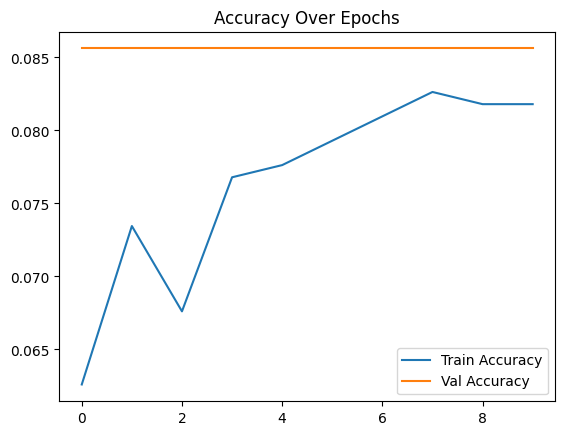

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [29]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model in the native Keras format
model.save("tree_species_model.h5")

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1198 images belonging to 31 classes.
Found 292 images belonging to 31 classes.
Epoch 1/10
38/38 [==============================] - 191s 5s/step - loss: 3.4838 - accuracy: 0.0684 - val_loss: 3.3884 - val_accuracy: 0.1164
Epoch 2/10
38/38 [==============================] - 174s 5s/step - loss: 3.2458 - accuracy: 0.1027 - val_loss: 3.0997 - val_accuracy: 0.1301
Epoch 3/10
38/38 [==============================] - 174s 5s/step - loss: 3.0847 - accuracy: 0.1311 - val_loss: 2.9499 - val_accuracy: 0.1473
Epoch 4/10
38/38 [==============================] - 174s 5s/step - loss: 2.9288 - accuracy: 0.1619 - val_loss: 2.8623 - val_accuracy: 0.2055
Epoch 5/10
38/38 [==============================] - 182s 5s/step - loss: 2.8610 - accuracy: 0.1878 - val_loss: 2.7092 - val_accuracy: 0.2226
Epoch 6/10
38/38 [==============================] - 175s 5s/step - loss: 2.7482 - accuracy: 0.2179 - val_loss: 2.6201 - val_accuracy: 0.2671
Epoch 7/10
38/38 [==============================] - 174s 5s/step - lo

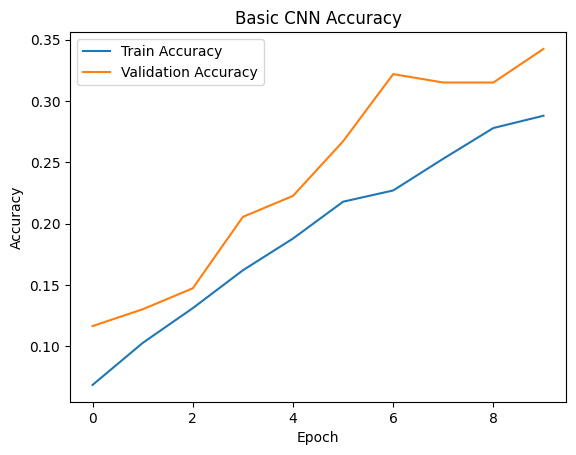

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Changed to num_classes for 31 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

Epoch 1/25
38/38 [==============================] - 240s 6s/step - loss: 4.3611 - accuracy: 0.0893 - val_loss: 4.8027 - val_accuracy: 0.0274
Epoch 2/25
38/38 [==============================] - 225s 6s/step - loss: 3.2522 - accuracy: 0.1169 - val_loss: 8.0096 - val_accuracy: 0.0342
Epoch 3/25
38/38 [==============================] - 220s 6s/step - loss: 3.1496 - accuracy: 0.1336 - val_loss: 9.5211 - val_accuracy: 0.0342
Epoch 4/25
38/38 [==============================] - 231s 6s/step - loss: 3.0870 - accuracy: 0.1419 - val_loss: 10.2834 - val_accuracy: 0.0548
Epoch 5/25
38/38 [==============================] - 221s 6s/step - loss: 3.1436 - accuracy: 0.1461 - val_loss: 15.3518 - val_accuracy: 0.0856
Epoch 6/25
38/38 [==============================] - 223s 6s/step - loss: 3.0549 - accuracy: 0.1653 - val_loss: 14.8320 - val_accuracy: 0.0856
Epoch 7/25
38/38 [==============================] - 222s 6s/step - loss: 2.9912 - accuracy: 0.1644 - val_loss: 14.1179 - val_accuracy: 0.0890
Epoch 8/2